In [1]:
from time import time
import numpy as np
from matplotlib import pyplot as plt
import os
root_dir = os.path.dirname(os.getcwd())
os.chdir(root_dir)

# 2 - POD Frequency Sweep

In this example, we explore the use of POD for accelerating the computation of the MPT over a range of exciting frequencies.

The computation of the MPT coefficents at a single frequency requires the setting up and solving of a finite element problem (which we also refer to as the full order problem) and, if we want to get a MPT spectral signature, we would need to repeatabile solve the finite element problem for each frequency of interest. To get high fidelity MPT spectral signatures, this requires the use of large number of repeated full order solutions, which can become expensive if high order elements are used.

To reduce the computational cost of producing high fidelity spectral signatures the routine use of the Proper Orthogonal Decomposition (POD) reduced order model is recommended. This only requires the calculation of a small number of full order solutions (typically) and is able to accurately predict the full MPT spectral signature at high-fidelity at much reduced cost.

See

[1] B. A. Wilson, P. D. Ledger, Efficient computation of the magnetic polarizabiltiy tensor spectral signature using proper orthogonal decomposition, Int. J. Numer. Meth. Eng. 122(8), 2021

for a mathematical justification.

## Workflow
The POD mode of $\texttt{MPT-Calculator}$ operates as follows:


 <img src="Figures/POD_flowchart.png" alt="isolated"/>

## Example

The POD mode of $\texttt{MPT-Calculator}$ is used by setting the $\texttt{use_POD}$ argument in the main function to True:
```python
main(use_POD=True)
```

We again consider the MPT characterisation of a conducting sphere with  $10^6$ S/m, and radius 0.001 m using the same default descretisation as in Tutorial 2

When using POD, the default settings are to have  13 full order model solutions obtained at logarthmically spaced frequency snapshots and to extract model information based on a singular value decomposition using a tolerance of $10^{-6}$. Reduced order model solutions are then computed at 40 logarthmically spaced frequency snapshots between $10^1$ and $10^8$ rad/s.


In [2]:
from main import main

importing NGSolve-6.2.2203


sphere.geo
generating mesh
 mesh contains 7592 elements
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
 solved theta0 problems    
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2203del
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pooler system 40/40    
 reduced order systems solved          
 frequency sweep complete


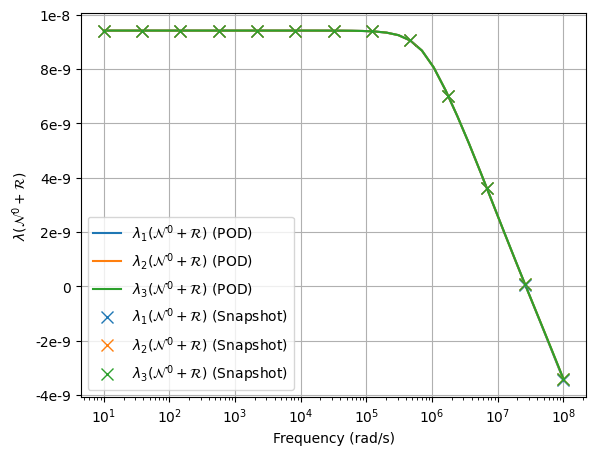

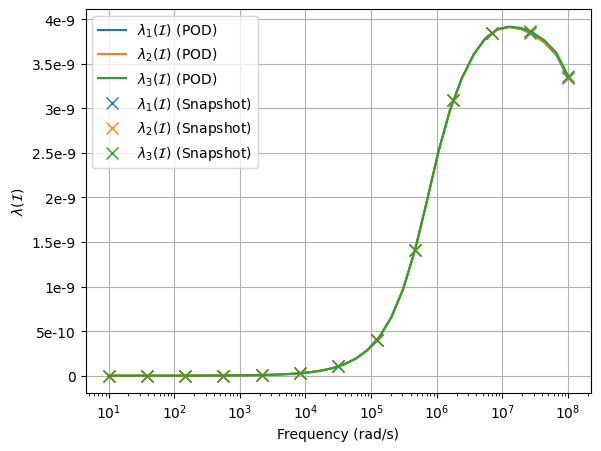

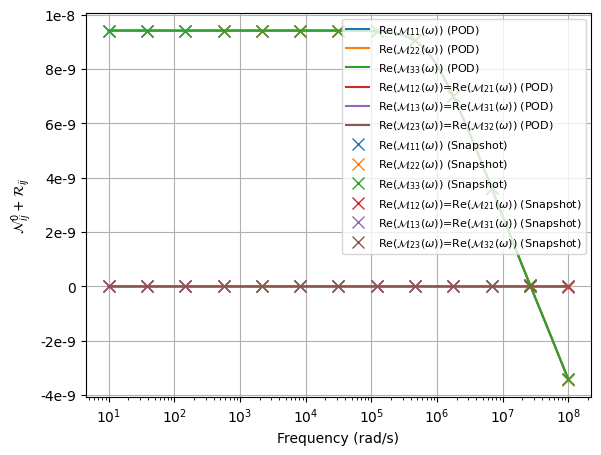

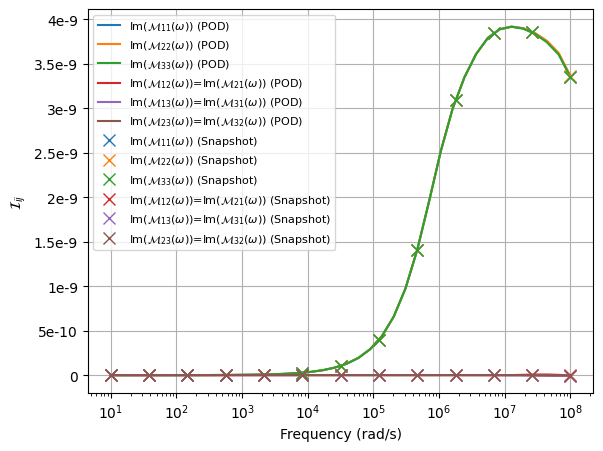

In [3]:
start_time = time();
Return_Dict = main(use_POD=True);
stop_time = time();

The graphs produced above show the POD solutions as continous lines with the snapshot (full order model solutions) indicated by crosses. The POD solutions pass through the full order model solutions as expected.

We can see that the computation time for the POD mode of MPT-Calculator is significantly faster than the equivalent full order sweep.

In [4]:
print(f'Total time = {(stop_time - start_time)/60} minutes')

Total time = 0.604998008410136 minutes


## Estimating ROM Error:

The POD method also allows us to generate error certificates at minimal computational cost. These error certificates correspond to an approximation on the upper limit of the difference between the POD solution and the equivalent full order solution,

$|(\mathcal{R}[\alpha B, \omega])_{ij} - (\mathcal{R}^{\rm POD}[\alpha B, \omega])_{ij}| \le (\Delta[\omega])_{ij}$

$|(\mathcal{I}[\alpha B, \omega])_{ij} - (\mathcal{I}^{\rm POD}[\alpha B, \omega])_{ij}| \le (\Delta[\omega])_{ij}$

We can estimate upper limits on the accuracy of the POD with respect to the full order solution method directly within the software.
We do this within $\texttt{Settings.py}$ by changing
```python
#Produce certificate bounds for POD outputs
PODErrorBars = False
#(boolean)
```
to $\texttt{True}$.


sphere.geo
generating mesh
 mesh contains 7592 elements
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
 solved theta0 problems    
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2203del
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pooler system 38/40    
 reduced order systems solved          
 frequency sweep complete


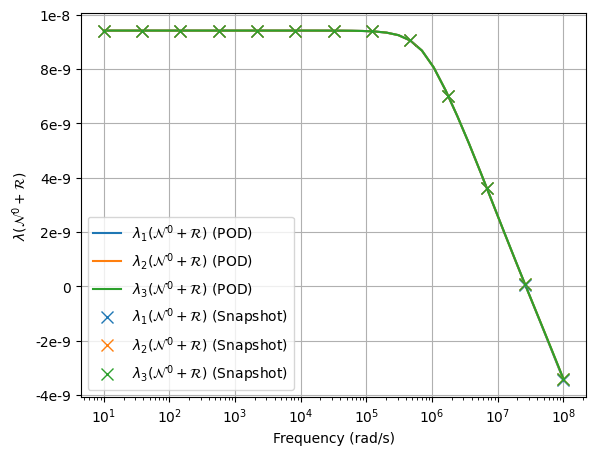

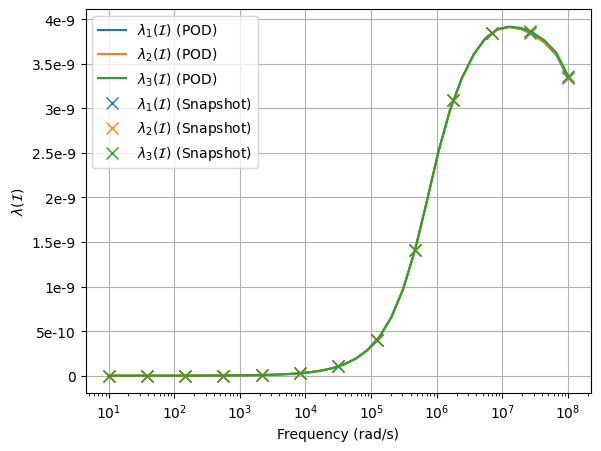

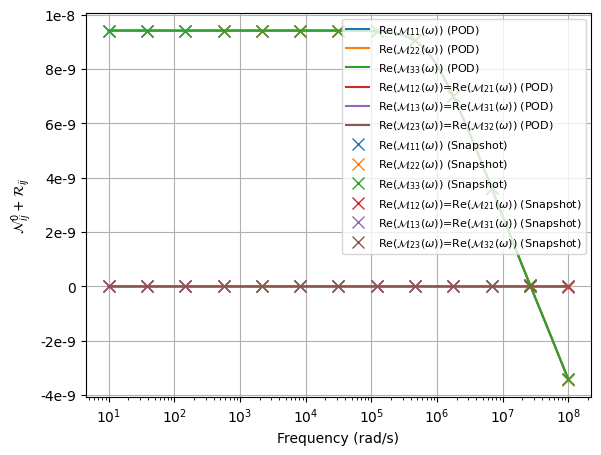

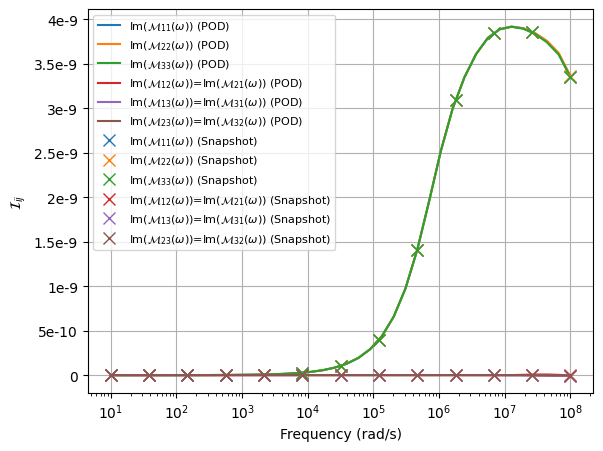

In [5]:
# Change settings first.
Return_Dict_POD = main(use_POD=True);

The above results show the same MPT spectral signature as before, but with the addition of error certificates.

The error certificates are shown to be extremely tight when evaluating the MPT at the snapshot frequencies. In addition, if we evaluate the relative error between the POD and full order solutions, 

$\frac{||\mathcal{M}^{(POD)} - \mathcal{M}^{(hp)}||_F}{||\mathcal{M}^{(hp)}||_F}$

we see that the true error is actually much smaller.


sphere.geo
generating mesh
 mesh contains 7592 elements
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
 solved theta0 problems    
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
Frequency Sweep complete 


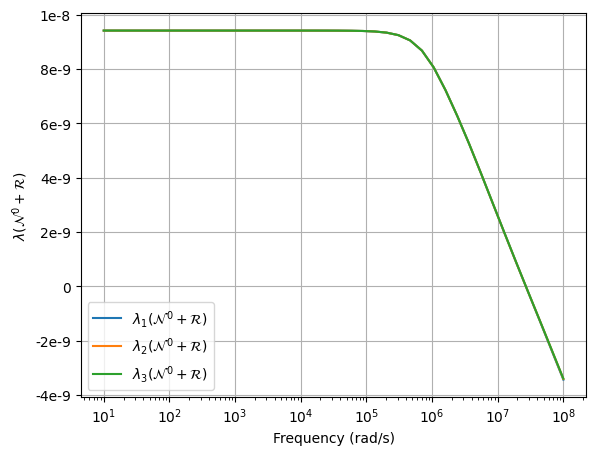

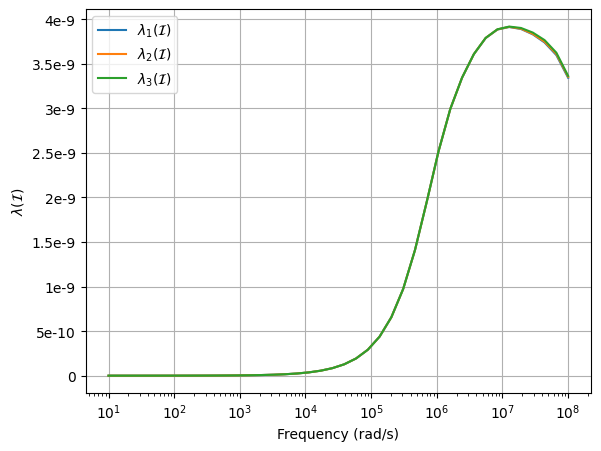

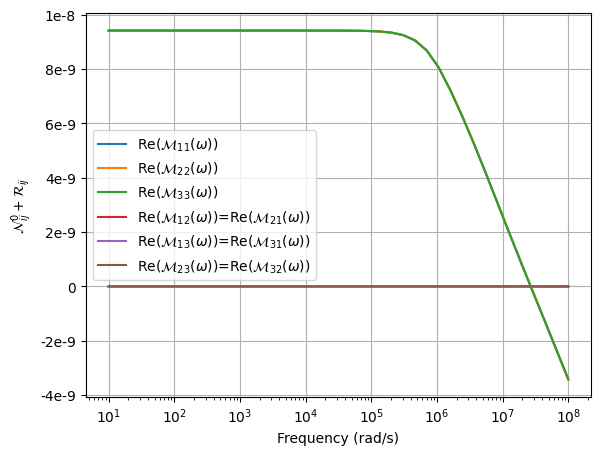

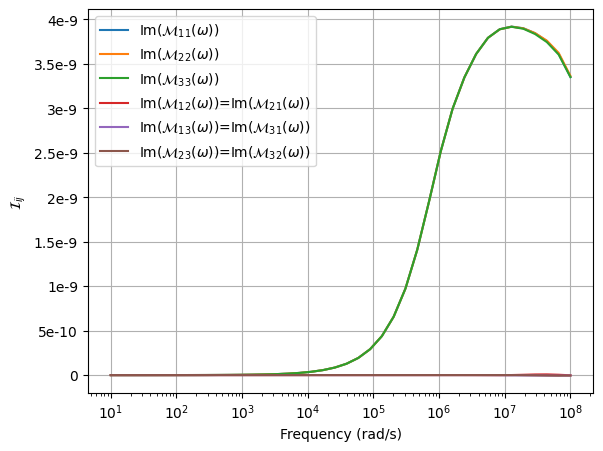

In [6]:
Return_Dict_full = main(use_POD=False)

relative_error = np.zeros(40)
for f in range(40):
    full_solutions = Return_Dict_full['TensorArray'][f,:]
    POD_solutions = Return_Dict_POD['TensorArray'][f,:]

    relative_error[f] = np.linalg.norm(POD_solutions - full_solutions) / np.linalg.norm(full_solutions)

Text(0, 0.5, 'Relative Error $\\mathcal{M}$')

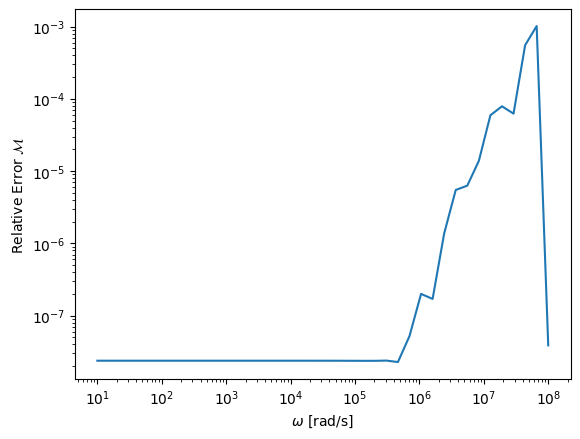

In [8]:
plt.figure()
plt.loglog(Return_Dict_full['FrequencyArray'], relative_error)
plt.xlabel('$\omega$ [rad/s]');
plt.ylabel('Relative Error $\mathcal{M}$');

The accuracy of the POD approximation with respect to the full order solution depends on the tolerance of the truncated singular value decomposition and the number of POD snapshots used. Both these parameters can be changed in the $\texttt{Settings.py}$ file.

For example, changing 
```python
#How many snapshots should be taken
PODPoints = 13
#(int)
```
to 20 will increase the number of snapshot solutions used in the construction of the POD and improve accuracy but take longer to compute.

Similarly, decreasing the tolerance on the truncated singular value decomposition will result in more retained information, but necessitates solving a larger problem.
```python
#Tolerance to be used in the TSVD
PODTol = 10**-6
#(float)
```


## Saving Results:
The output of the simulation, including any figures, are saved in the Results subfolder of the root directory.

For example:

$\texttt{Results/sphere/al_0.001_mu_1_sig_1e6/1e1-1e8_40_el_3839_ord_2_POD_13_1e-6}$

The results folder will contain a copy of the input files used for the simulation, including the mesh, .geo file, and a copy of the main function. This is so that the results can be recreated. 

The naming of the subfolders reflects
- The sphere problem that has been solved.
- The object size and materials ($\alpha=1\times 10^3$ m,  $\sigma=1\times 10^6$ S/m, ) by $\texttt{al_0.001_mu_1_sig_1e6}$.
- The frequency range, number of samples, number of elements and element order ($10^1 \le \omega \le 10^8$ rad/s, 40 samples, 3 839 elements, ) by $\texttt{1e1-1e8_40_el_3839_ord_2}$.
- The number of POD snapshots and the TSVD truncation tolerance by $\texttt{POD_13_1e-6}$.

The computed POD solutions are stored also stored in the Data/ folder that we introduced in Tutorial [1](./1_full_order_solve_example.ipynb). These are stored with the prefix "POD".
